### Predicting churn, so classification

In [1]:
# Importing basic libs
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("../data/Churn_Modelling.csv")
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [3]:
df.value_counts()

RowNumber  CustomerId  Surname   CreditScore  Geography  Gender  Age  Tenure  Balance    NumOfProducts  HasCrCard  IsActiveMember  EstimatedSalary  Exited
9984       15656710    Cocci     613          France     Male    40   4       0.00       1              0          0               151325.24        0         1
9983       15768163    Griffin   655          Germany    Female  46   7       137145.12  1              1          0               115146.40        1         1
9982       15672754    Burbidge  498          Germany    Male    42   3       152039.70  1              1          1               53445.17         1         1
9981       15719276    T'ao      741          Spain      Male    35   6       74371.49   1              0          0               99595.67         0         1
9980       15692664    Diribe    677          France     Female  58   1       90022.85   1              0          1               2988.28          0         1
                                             

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [5]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [6]:
df.describe(include=['object'])

,Surname,Geography,Gender
count,10000,10000,10000
unique,2932,3,2
top,Smith,France,Male
freq,32,5014,5457


In [7]:
df["Exited"].value_counts()

Exited
0    7963
1    2037
Name: count, dtype: int64

In [8]:
df.duplicated().sum()

np.int64(0)

### So there are no missing values and no duplicates, we move on with graphs

Surname, geography and gender will be processed (I'll remove surname, as it doesn't affect exited)

In [9]:
# Making basic plots
sns.set_theme(style="whitegrid")
plt.rcParams['figure.figsize'] = [10, 6]

C:\Users\Asus\AppData\Local\Temp\ipykernel_27204\3164723836.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Exited', data=df, palette='viridis')


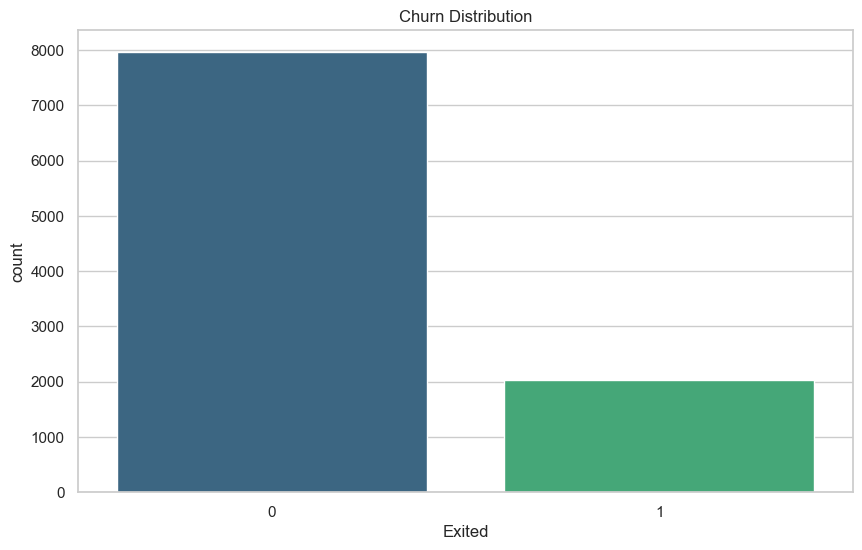

In [10]:
sns.countplot(x='Exited', data=df, palette='viridis')
plt.title("Churn Distribution")
plt.show()

C:\Users\Asus\AppData\Local\Temp\ipykernel_27204\550512951.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df, palette='Set2')


Geography
France     5014
Germany    2509
Spain      2477
Name: count, dtype: int64


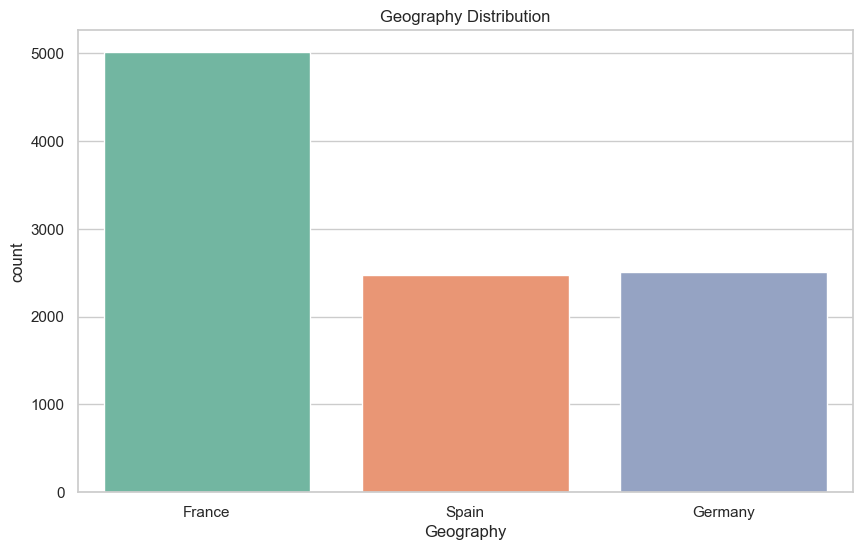

Gender
Male      5457
Female    4543
Name: count, dtype: int64


C:\Users\Asus\AppData\Local\Temp\ipykernel_27204\550512951.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df, palette='Set2')


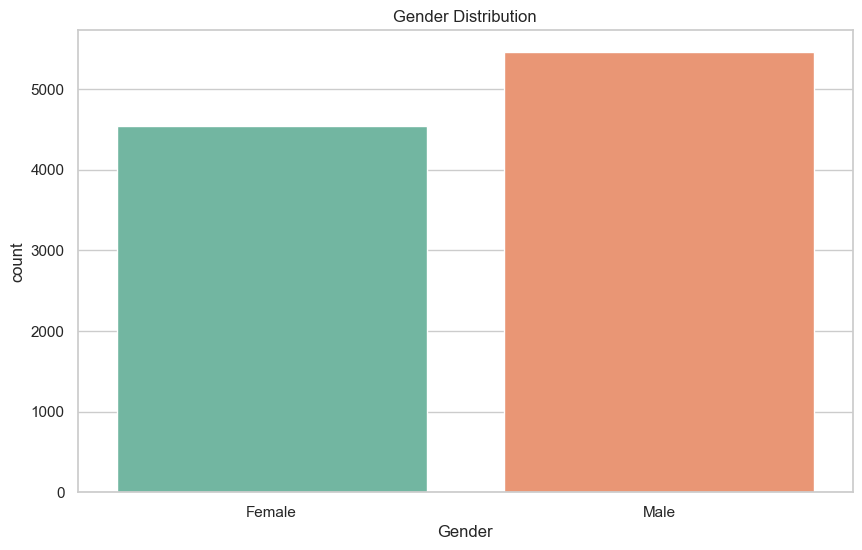

In [11]:
cat_cols = ['Geography','Gender']  # Surname is a lot, and not useful for analysis

for col in cat_cols:
    print(df[col].value_counts())
    sns.countplot(x=col, data=df, palette='Set2')
    plt.title(f"{col} Distribution")
    plt.show()

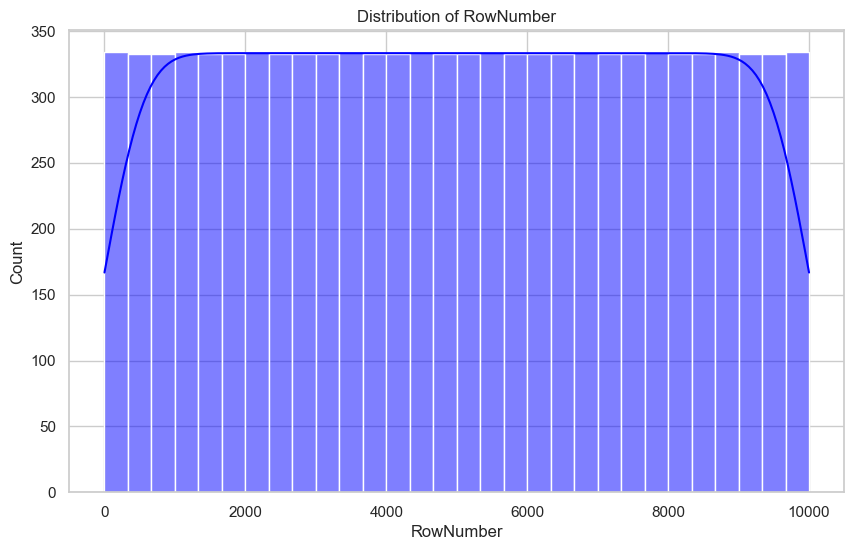

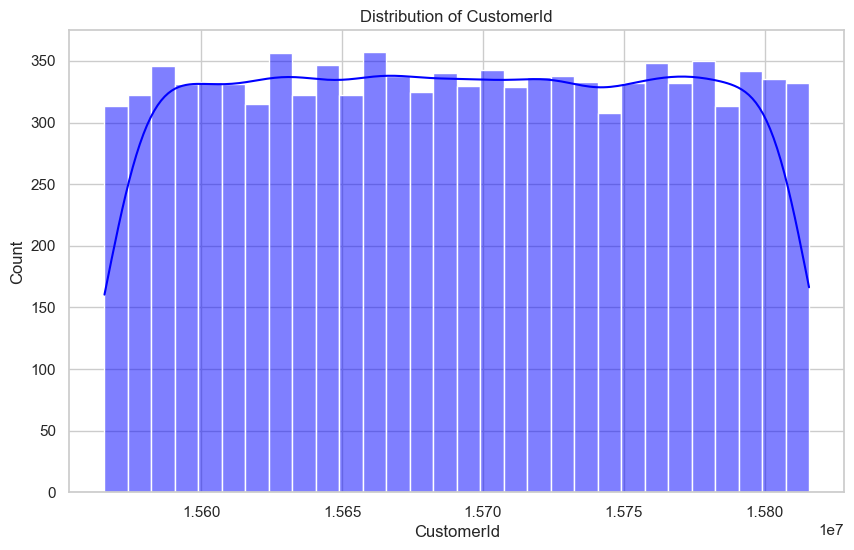

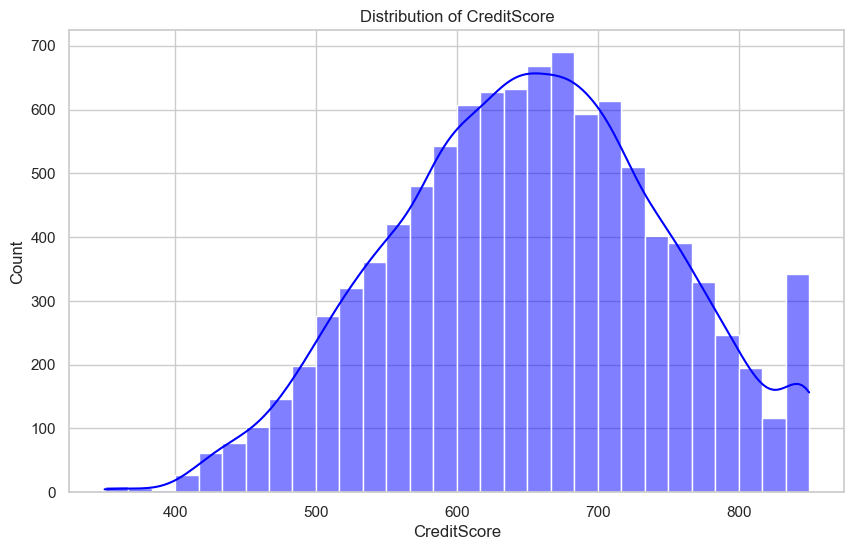

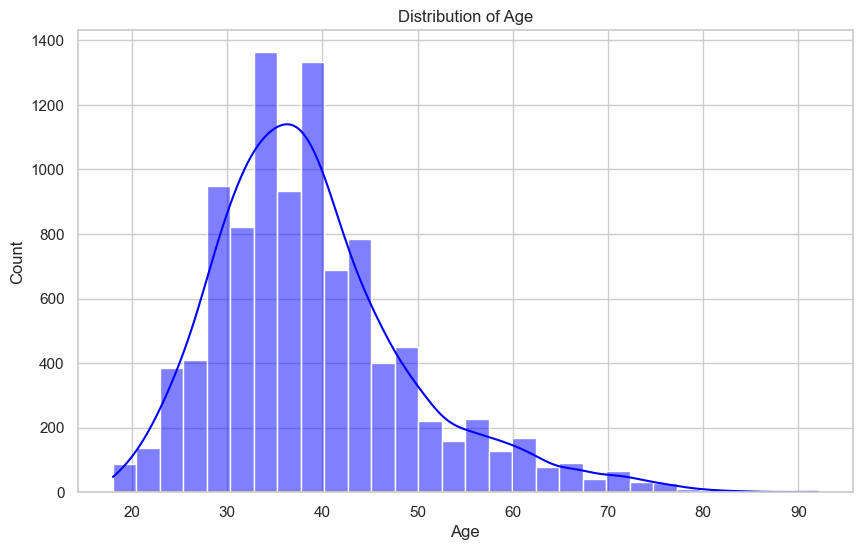

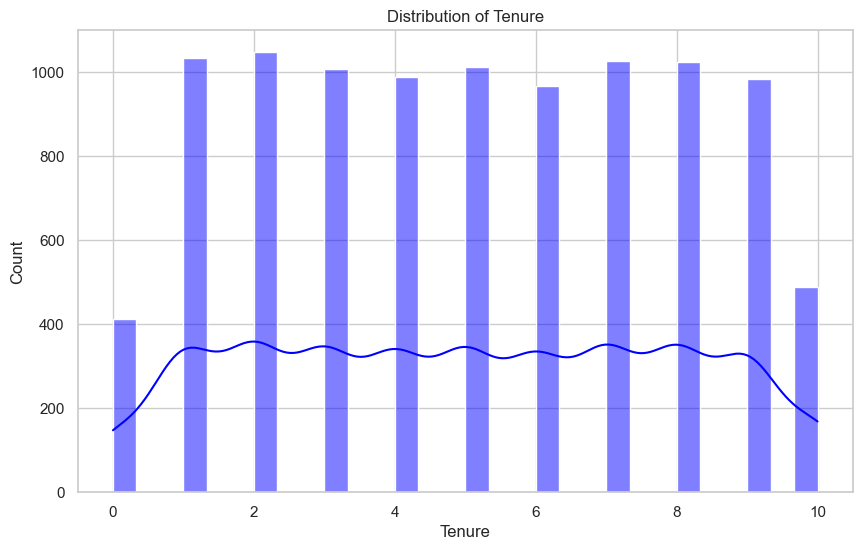

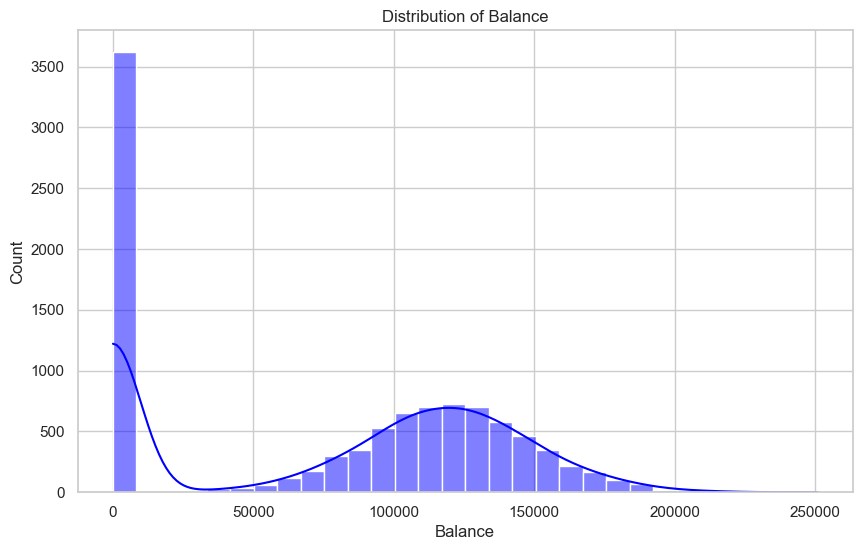

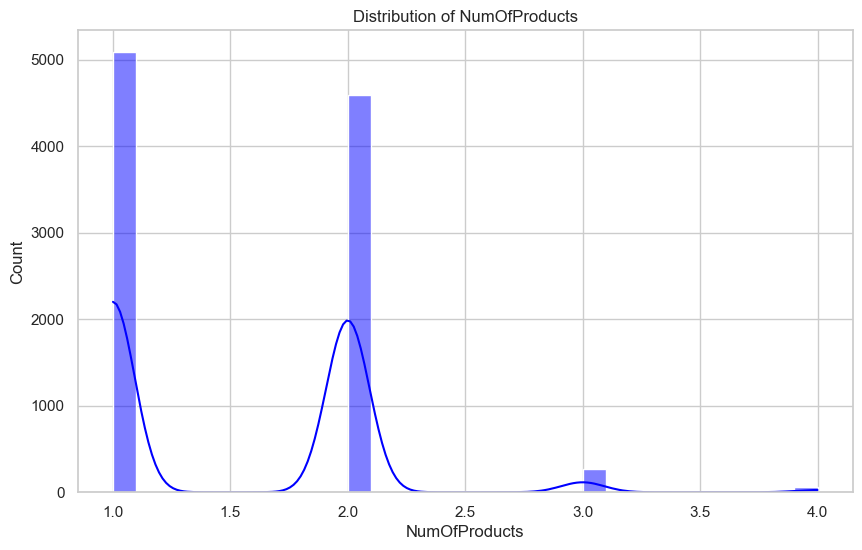

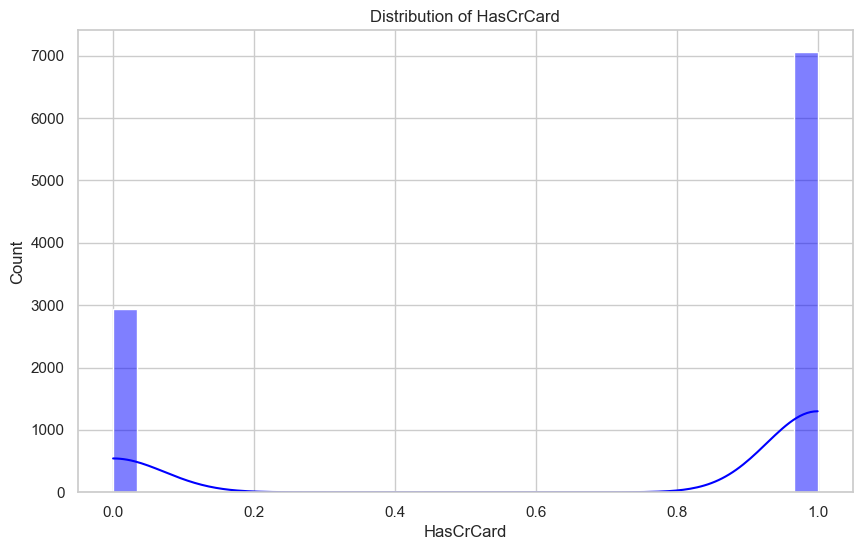

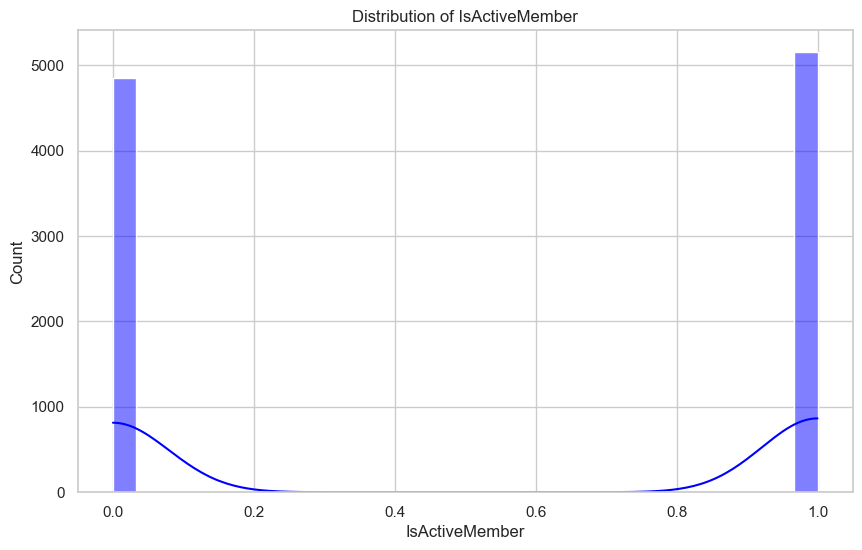

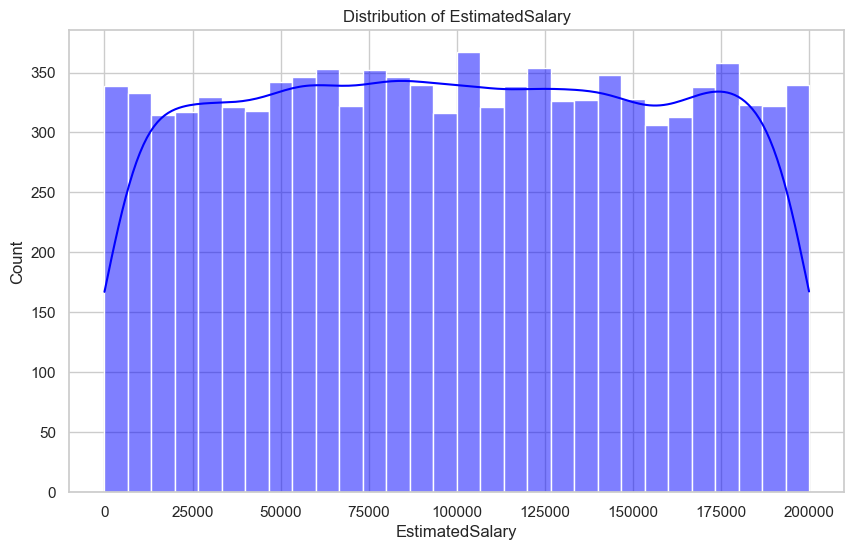

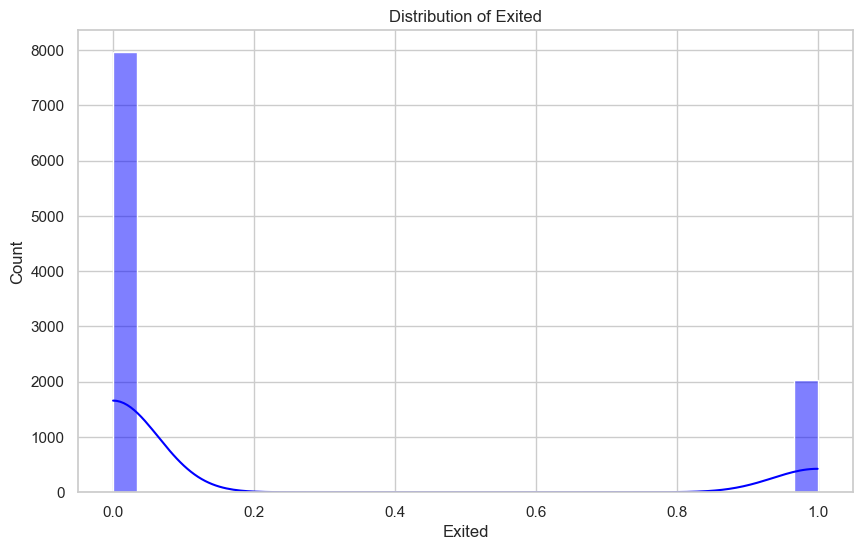

In [12]:
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()

for col in numeric_cols:
    sns.histplot(df[col], kde=True, bins=30, color='blue')
    plt.title(f"Distribution of {col}")
    plt.show()

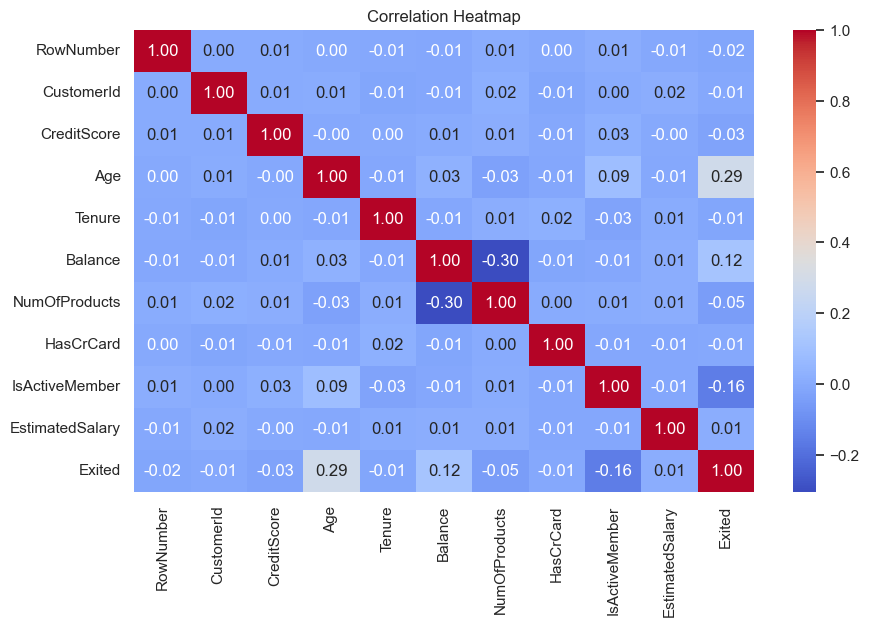

In [13]:
corr = df.corr(numeric_only=True)
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()


Average values by churn status:

              Age  CreditScore    Tenure       Balance  EstimatedSalary
Exited                                                                 
0       37.408389   651.853196  5.033279  72745.296779     99738.391772
1       44.837997   645.351497  4.932744  91108.539337    101465.677531


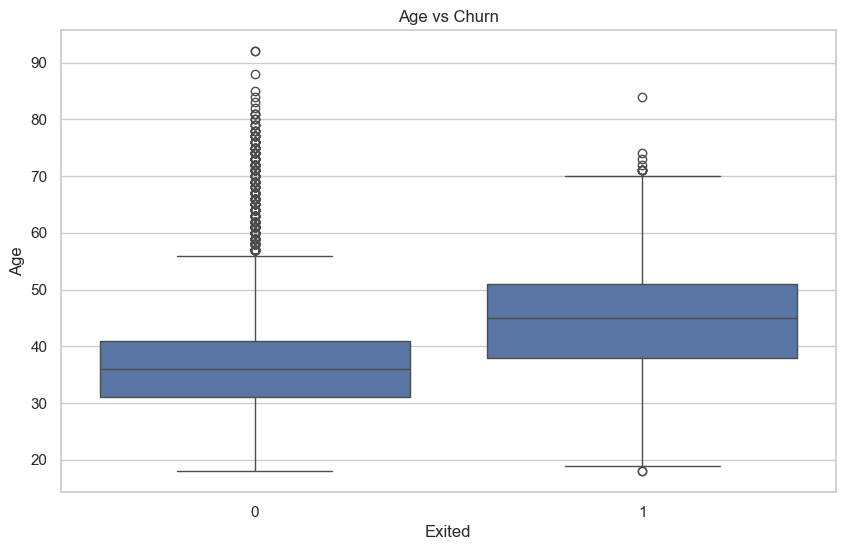

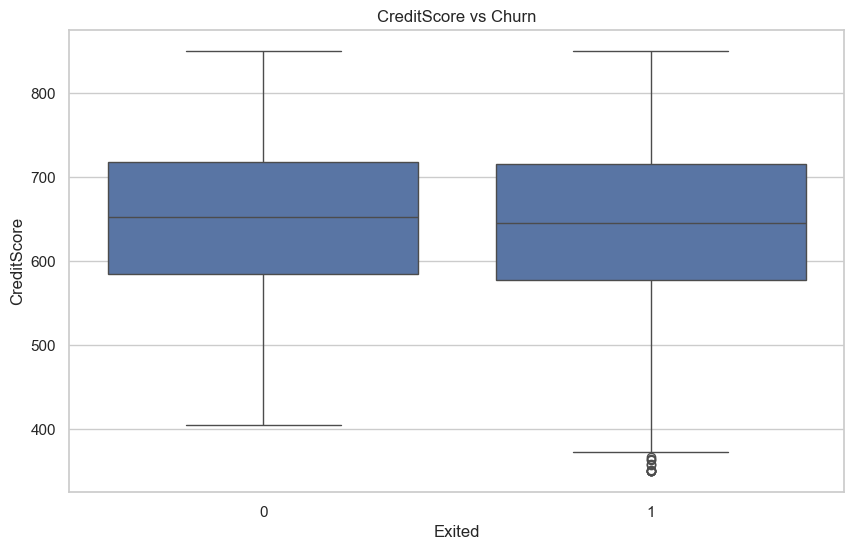

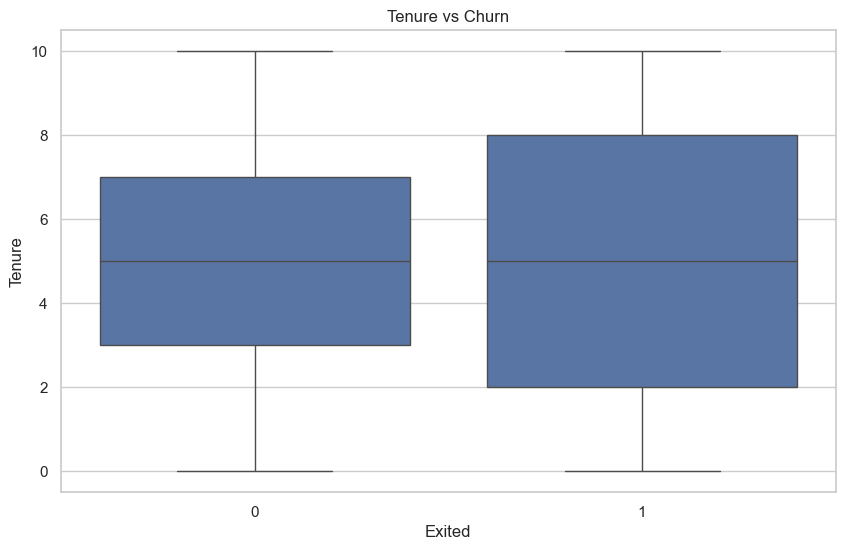

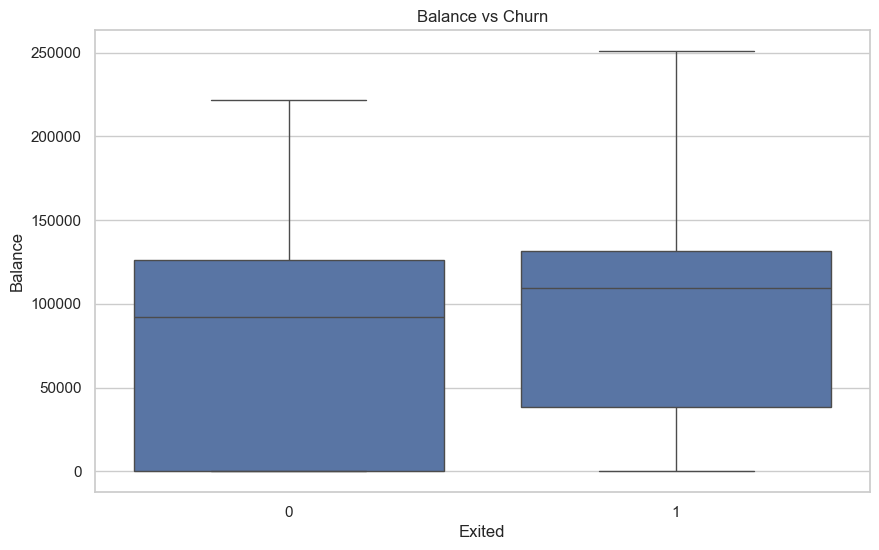

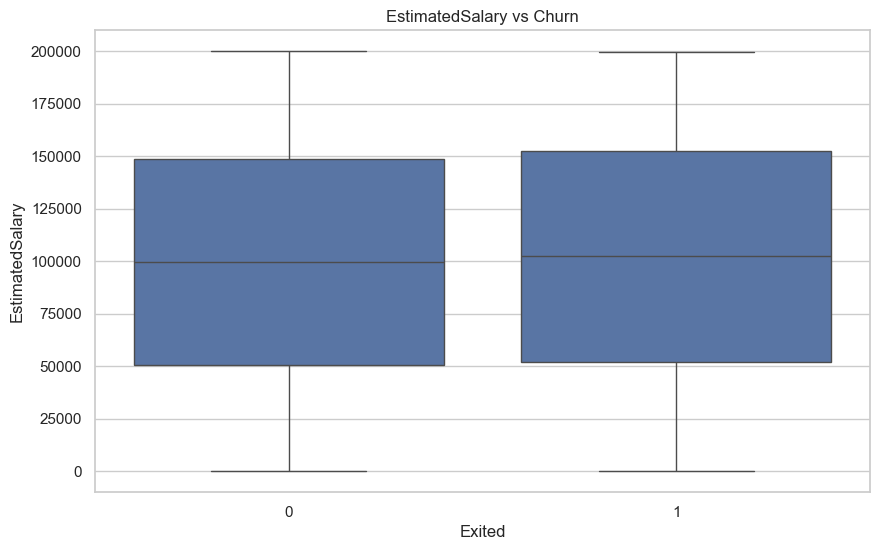

In [14]:
# List of numeric columns you want to compare with churn
numeric_cols = ['Age', 'CreditScore', 'Tenure', 'Balance', 'EstimatedSalary']

# 1. Print average values by churn status
print("Average values by churn status:\n")
print(df.groupby('Exited')[numeric_cols].mean())

# 2. Boxplots for each feature vs churn
for col in numeric_cols:
    sns.boxplot(x='Exited', y=col, data=df)
    plt.title(f"{col} vs Churn")
    plt.show()


1. There will be a bias in exited as there are less churned people
2. Geography also, france is more than other 2
3. Gender is fine, but might be better if tweaked a lil

* Only age and balance seem to have the most effect on churned, still not a lot, meaning multiple factors affect exited
* Distribution graphs give us the ranges
* Boxplots give us an estimate of stuff, and some reason related to exiting

### Processing the data

In [15]:
df.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [16]:
# Removing some columns
df_dup = df.drop(columns=['Surname','RowNumber','CustomerId']) # There are others will less correlation, but they can matter a little
df_dup.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [17]:
# To convert Gender and Geography


from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
df_dup['Gender'] = encoder.fit_transform(df_dup['Gender'])
df_dup.head()


,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,0,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,0,41,1,83807.86,1,0,1,112542.58,0
2,502,France,0,42,8,159660.80,3,1,0,113931.57,1
3,699,France,0,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,0,43,2,125510.82,1,1,1,79084.10,0


So female -> 0 and male -> 1

Actually it is better to convert stuff at once with pipeline, so shifting label encoding down

#### Now we create the pipeline code, the big block of code

In [18]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split

# Splitting data
x = df_dup.drop('Exited', axis=1)
y = df_dup['Exited']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25)


# Seperating features
cat_feats = ['Geography']
num_feats = ['CreditScore', 'Age', 'Tenure', 'Balance','NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary']


# Creating transformers
cat_tf = OneHotEncoder(drop='first', handle_unknown='ignore')
num_tf = StandardScaler()


# Putting them in coulmnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', cat_tf, cat_feats),
        ('num', num_tf, num_feats)
    ],
    remainder='passthrough'  # For Gender is done separately
)


In [19]:
x_train_pro = preprocessor.fit_transform(x_train)
x_test_pro = preprocessor.transform(x_test)


In [20]:
x_train_pro

array([[ 0.        ,  0.        ,  0.99790391, ..., -1.0319777 ,
         1.24633075,  1.        ],
       [ 0.        ,  0.        , -0.41098775, ..., -1.0319777 ,
         0.18958579,  0.        ],
       [ 0.        ,  1.        , -1.08972388, ..., -1.0319777 ,
        -1.06967927,  0.        ],
       ...,
       [ 1.        ,  0.        ,  0.78194242, ...,  0.96901319,
         1.10330443,  1.        ],
       [ 0.        ,  0.        , -0.42127163, ..., -1.0319777 ,
         0.25451789,  1.        ],
       [ 0.        ,  1.        , -0.99716896, ...,  0.96901319,
         1.38854346,  1.        ]], shape=(7500, 11))

In [25]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score

models = {
    'RF': RandomForestClassifier(class_weight='balanced'),
    'GB': GradientBoostingClassifier(),
    'LR': LogisticRegression(class_weight='balanced')
}

for model in models.values():
    model.fit(x_train_pro, y_train)
    y_preds = model.predict(x_test_pro)
    score = model.score(x_test_pro, y_test)
    f1_macro = f1_score(y_test, y_preds, average='macro')
    f1_weighted = f1_score(y_test, y_preds, average='weighted')
    print(f"{model}\n Accuracy: {score}\n F1 Macro: {f1_macro}\n F1 Weighted: {f1_weighted}\n\n")


RandomForestClassifier(class_weight='balanced')
 Accuracy: 0.8592
 F1 Macro: 0.7263201631131828
 F1 Weighted: 0.8439439911725812


GradientBoostingClassifier()
 Accuracy: 0.8596
 F1 Macro: 0.732573140103332
 F1 Weighted: 0.8462559131507272


LogisticRegression(class_weight='balanced')
 Accuracy: 0.7064
 F1 Macro: 0.6339850195154799
 F1 Weighted: 0.7344021956909565




In [22]:
y_preds 

array([1, 0, 1, ..., 0, 0, 1], shape=(2500,))

In [33]:
from sklearn.metrics import roc_auc_score, precision_score, recall_score, f1_score, classification_report

threshold = 0.32
for name, model in models.items():
    y_prob = model.predict_proba(x_test_pro)[:, 1]
    
    y_pred_custom = (y_prob >= threshold).astype(int)

    
    roc_auc = roc_auc_score(y_test, y_prob)
    precision = precision_score(y_test, y_pred_custom, pos_label=1)
    recall = recall_score(y_test, y_pred_custom, pos_label=1)
    f1 = f1_score(y_test, y_pred_custom, pos_label=1)

    print(f"--- {name} ---")
    print(f"ROC-AUC: {roc_auc:.4f}")
    print(f"Precision (Churn): {precision:.4f}")
    print(f"Recall (Churn): {recall:.4f}")
    print(f"F1 (Churn): {f1:.4f}")
    print()


--- RF ---
ROC-AUC: 0.8534
Precision (Churn): 0.5656
Recall (Churn): 0.6117
F1 (Churn): 0.5878

--- GB ---
ROC-AUC: 0.8626
Precision (Churn): 0.5922
Recall (Churn): 0.6033
F1 (Churn): 0.5977

--- LR ---
ROC-AUC: 0.7629
Precision (Churn): 0.2672
Recall (Churn): 0.8831
F1 (Churn): 0.4103



In [38]:
# Saving it with the pipeline

import joblib

from sklearn.pipeline import Pipeline

# Saving pipeline too, so data conversion is not needed everytime
final_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),  
    ('model', GradientBoostingClassifier(random_state=42))
])

final_pipeline.fit(x, y)

joblib.dump(final_pipeline, 'bank_churn_pipeline.pkl')


['bank_churn_pipeline.pkl']

In [36]:
models["GB"].feature_importances_

array([0.05765685, 0.00055207, 0.01490122, 0.38764459, 0.00424955,
       0.08225712, 0.30256931, 0.00130389, 0.11750205, 0.01457911,
       0.01678423])